### In order to demonstrate the power of vectorization, we will do it the fast way now and compare the time it took

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import time  # for timing code

# Lorenz's parameters (chaotic)
sigma = 10 
beta = 8 / 3
rho = 28

# Define two functions we need
def rk4singlestep(fun, dt, t0, y0):
    """
        Long comments describing functions or other complicated
        classes can be left with the triple-quotes notation like this.
        
        This function does a single 4th-order Runge-Kutta step for ODE integration,
        where fun is the ODE, dt is the timestep, t0 is the current time, and y0 is
        the current initial condition. 
    """
    f1 = fun(t0, y0)
    f2 = fun(t0 + dt / 2, y0 + (dt / 2) * f1)
    f3 = fun(t0 + dt / 2, y0 + (dt / 2) * f2)
    f4 = fun(t0 + dt, y0 + dt * f3)
    yout = y0 + (dt / 6) * (f1 + 2 * f2 + 2 * f3 + f4)
    return yout

def lorenz(t, y):
    """
        This function defines the dynamical equations
        that represent the Lorenz system. 
        
        Normally we would need to pass the values of
        sigma, beta, and rho, but we have already defined them
        globally above.
    """
    # y is a three dimensional state-vector
    dy = [sigma * (y[1] - y[0]), 
          y[0] * (rho - y[2]) - y[1],
          y[0] * y[1] - beta * y[2]]
    return np.array(dy)

Total time elapsed =  0.2892732620239258  seconds


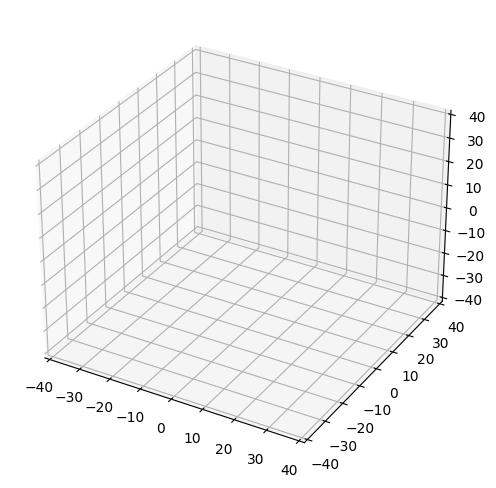

In [2]:
# Initial condition
y0 = [-8, 8, 27]

# Compute trajectory 
dt = 0.01
nt = int(50 / dt)
t = np.linspace(0, 50, nt)

lorenz_solution = solve_ivp(lorenz, (0, 50), y0, t_eval=t)
y = lorenz_solution.y.T

# Plot the trajectory
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')  # make a 3D plot
#ax.plot(y[:, 0], y[:, 1], y[:, 2], 'k')

# Initial condition 1 - Large cube of data
y0 = [-8, 8, 27]
n = 10
xvec = np.linspace(-20, 20, n)
yvec = np.linspace(-20, 20, n)
zvec = np.linspace(-20, 20, n)

# Initial condition 2 - small cube around initial condition from last class
y0 = [-8, 8, 27]
# xvec = np.linspace(-1, 1, n)
# yvec = np.linspace(-1, 1, n)
# zvec = np.linspace(-1, 1, n)

# Initial condition 3 - even smaller cube around initial condition
y0 = [-8, 8, 27]
# xvec = np.linspace(-0.1, 0.1, n)
# yvec = np.linspace(-0.1, 0.1, n)
# zvec = np.linspace(-0.1, 0.1, n)

[x0, y0, z0] = np.meshgrid(xvec + y0[0], yvec + y0[1], zvec + y0[2])

yIC = np.zeros((3, n ** 3))
yIC[0, :] = x0.reshape(n ** 3)
yIC[1, :] = y0.reshape(n ** 3)
yIC[2, :] = z0.reshape(n ** 3)

#ax.plot(yIC[0, :], yIC[1, :], yIC[2, :], 'r.', linewidth=2, markersize=2)
plt.xlim(-40, 40)
plt.ylim(-40, 40)
ax.set_zlim(-40, 40)

# Compute trajectory 
dt = 0.01
duration = 30
tspan=[0, duration]
L = int(duration / dt)
yin = yIC 
y_single_steps = np.zeros((L, 3, n ** 3))

start_time = time.time()
for step in range(L):
    tstep = step * dt
    yout = rk4singlestep(lorenz, dt, tstep, yin)
    yin = yout
    y_single_steps[step, :, :] = yout
end_time = time.time()
print('Total time elapsed = ', end_time - start_time, ' seconds')


# Plot the trajectory    
###for i in np.random.choice(n ** 3, 20):
###    ax.plot(y_single_steps[:, 0, i], y_single_steps[:, 1, i], y_single_steps[:, 2, i])
###plt.show()

In [3]:
def update_lines(num, y_single_steps, lines):
    for line, step in zip(lines, y_single_steps):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_xdata(step[0, :num])
        line.set_ydata(step[1, :num])
        line.set_3d_properties(step[2, :num])
        ax.view_init(elev=10, azim=num % 360)
    return lines

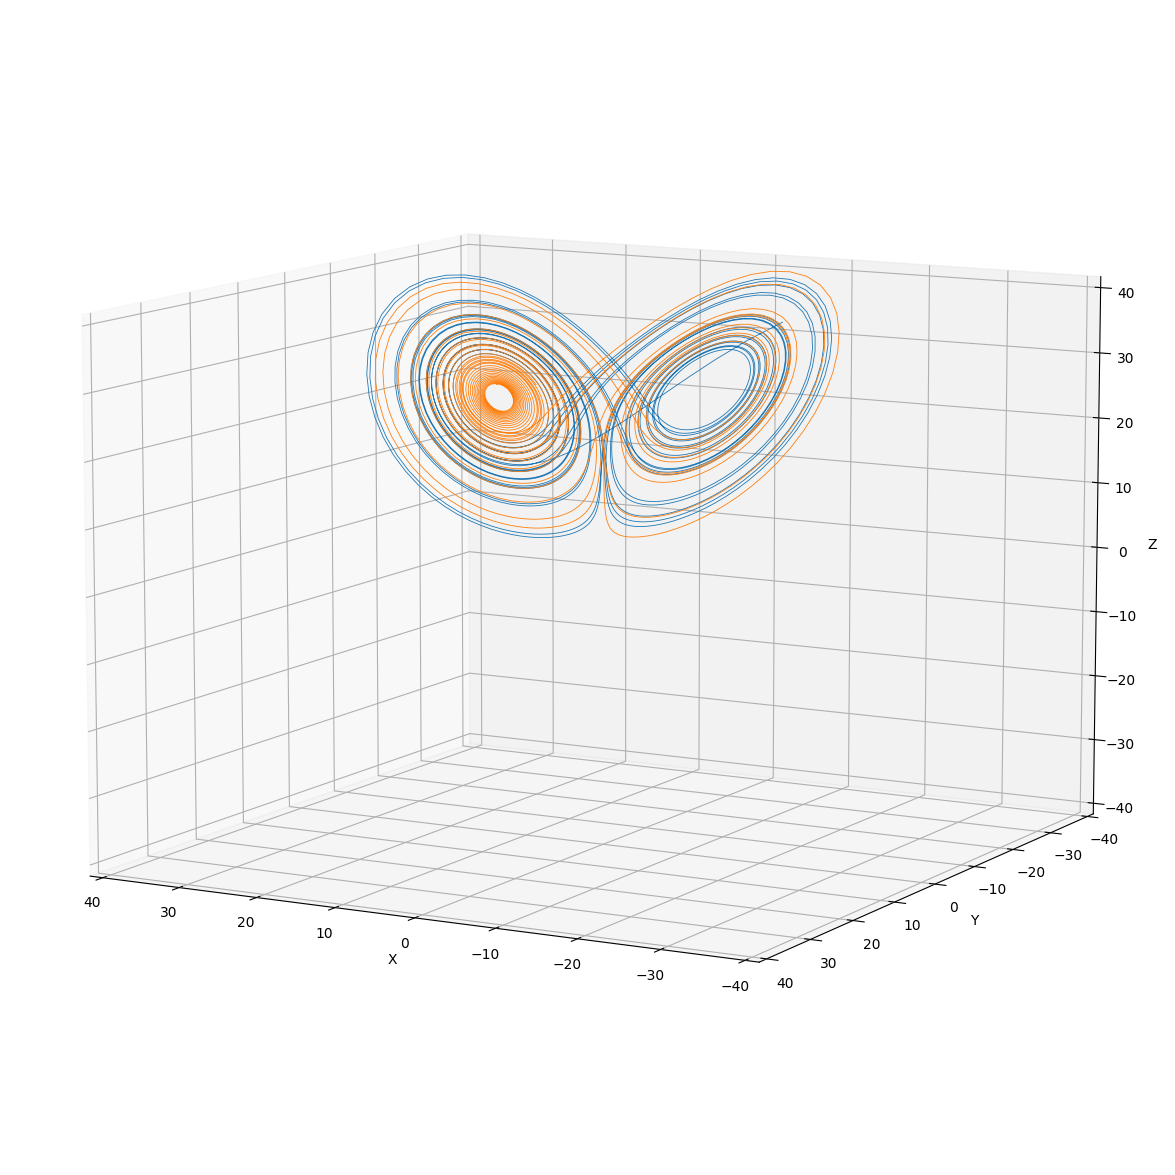

In [4]:
from matplotlib.animation import FuncAnimation



num_particles = 5
plot_list = []
for i in np.random.choice(n ** 3, num_particles):
    plot_list.append([y_single_steps[:, 0, i], y_single_steps[:, 1, i], y_single_steps[:, 2, i]])
    
plot_list = np.array(plot_list)

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(projection='3d')  # make a 3D plot

lines = [ax.plot([], [], [], lw=0.6)[0] for _ in range(num_particles)]

# Setting the axes properties
ax.set(xlim3d=(-40, 40), xlabel='X')
ax.set(ylim3d=(-40, 40), ylabel='Y')
ax.set(zlim3d=(-40, 40), zlabel='Z')


ani = FuncAnimation(
    fig, update_lines, 3000, fargs=(plot_list, lines), interval=50)

ani.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()